
# Tecnológico de Costa Rica
## Programa de Ciencia de Datos
### Prof. Jorge Castro Castro

### Estadística para Ciencia de los Datos 02-0871-01
#### Tarea-2

--- 

Entregables: Un archivo jupyter ( .IPYNB ). 

Modo de trabajo: Parejas:
Estudiantes:

Yu Hung Yeh Chai

José Alberto Raygada Agüero

---

En esta asignación se busca que los estudiantes exploren un conjunto de datos y determinen qué distribución modela más efectivamente cada columna. En particular, se sugiere que los estudiantes utilicen el conjunto de datos provisto, pero queda abierto a la decisión de los estudiantes usar otros sets de datos.

Deberán tomar en cuenta todas las distribuciones vistas en clase pero no deben limitarse a ellas. Se espera que haya un uso significativo de bibliotecas como `matplotlib` para mostrar visualmente la comparación entre los datos y las distribuciones propuestas.

Los estudiantes deberán entregar a más tardar el día 13 de febrero a las 10:00PM un notebook de colab con la solución a los siguientes ejercicios:

# Pregunta 1

Elija alguna variable **cuantitativa** del set de datos y: 
  - Muestre el histograma calculado dinámicamente (e.g. con `matplotlib`) (2 puntos)
  - Brinde al menos una propuesta de distribución candidata que modela esa columna, definiendo los parámetros de la distribución y una gráfica de la distribución paramétrica con `matplotlib` (10 puntos)
  - Proporcione una explicación detallada de qué valores y distribuciones se probaron en el proceso y por qué se hizo la escogencia. (3 puntos)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import torch
from torch.distributions import Exponential
from torch.distributions import Normal
from torch.distributions import Gamma
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import expon
from scipy.stats import weibull_min
from scipy.stats import t
from scipy.stats import ksone

#Funciones
def bold(t):
    """
    Funcion para formatear en negrita el texto.
    t = cualquier dato
    """
    return "\033[1m" + str(t) + "\033[0m"

def newline():
    """
    Funcion para imprimir cambio de linea
    """
    print("\r\n")
    
def titulo(t):
    """
    Funcion para imprimir titulo formateado.
    t = titulo
    """
    print(bold(t))
    print("----------------------------------------------")
    newline()

def imprimirVariable(nombre, valor):
    """
    Funcion para imprimir titulo formateado.
    nombre = nombre de la variable
    valor = el varlor de la variable
    """
    print(bold(nombre), ": ", valor)
    
def plotHistogram(data, bins, title, x, prob):
    plt.hist(data, bins, edgecolor = 'black', linewidth=1, density=True, color='blue', alpha=0.7)
    plt.title(title)
    plt.plot(x, prob, color="r", linewidth=2)

#Función para obtener los valores de bins manualmente
def divideEnBins(datos, cantidadBins):
    min = np.min(datos)
    max = np.max(datos)
    
    rango = max - min
    span = rango / (cantidadBins -1)
    
    bins = []

    for i in range(cantidadBins):
        valor = min + span * i
        bins.append(valor)

    return bins

#Función para graficar datos vs la distribución para comparar qué tanto se acerca a la distribución.
def graficarTestDistribucion(datos, distribucion, parametros):  
    stats.probplot(datos, dist=distribucion, sparams = parametros, plot = plt)
    plt.show()

#from google.colab import files 
  
  
#uploaded = files.upload()

In [2]:
df = pd.read_csv(r'datasetTarea2.csv')
df = pd.DataFrame(data=df)
df

,carat,cut,color,clarity,depth,table,price,x,y,z,unknownCol
0,0.32,Premium,J,VS2,61.9,58.0,504,4.38,4.35,2.70,5.100000
1,1.50,Good,F,SI2,62.9,59.0,7727,7.19,7.32,4.56,4.900000
2,0.38,Ideal,H,VS1,61.7,55.0,955,4.65,4.70,2.89,4.700000
3,0.53,Ideal,F,VVS1,62.1,53.2,2273,5.17,5.21,3.22,4.600000
4,0.55,Ideal,D,VS2,60.6,56.0,2224,5.30,5.36,3.23,5.000000
...,...,...,...,...,...,...,...,...,...,...,...
195,1.12,Premium,G,SI1,60.1,58.0,5233,6.78,6.83,4.09,6.763648
196,0.37,Ideal,D,VVS2,61.6,54.0,997,4.61,4.64,2.85,6.381457
197,0.30,Very Good,D,VVS2,60.6,58.0,2366,4.33,4.35,2.63,5.112152
198,2.18,Premium,J,VS2,60.1,58.0,15465,8.46,8.41,5.07,6.108909


In [3]:
# Análisis de los histogramas de las diferentes variables y propuestas de distribuciones

n_bins = 9

## Análisis de la variable 'carat'

### Comparación con la distribución:
#### Gamma
La distribución Gamma es adecuada para modelar el comportamiento de variables aleatorias continuas con asimétrica positiva, es decir, variables que presentan una mayor probabilidad de ocurrencia de eventos a la izquierda de la media que a la derecha.

Parpametros:
$\alpha$ (shape) es un *parámetro de forma* y $\beta$ (scale) es un *parámetro de escala*.

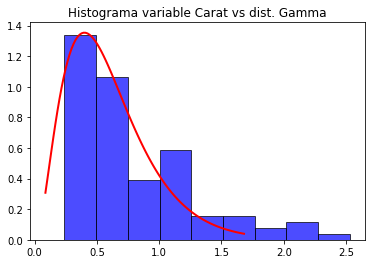

In [4]:
# Histograma de los datos de la columna 'carat'

carat = df['carat']

# Comparación con la distribución Gamma

shape = 3
scale = 0.2
gamma = stats.gamma(a=shape,scale=scale)
x = np.linspace(gamma.ppf(0.01),
                gamma.ppf(0.99), 100)
fp = gamma.pdf(x) # Función de Probabilidad

plotHistogram(carat, n_bins, 'Histograma variable Carat vs dist. Gamma', x, fp)

### Comparación con la distribución:
#### Exponencial
La distribución exponencial es utilizada para determinar la probabilidad de que en cierto tiempo suceda un determinado evento.

Parámetro:

Lambda:  $\lambda$ es el inverso de la duración esperada entre eventos y representa un parámetro de intensidad del proceso.

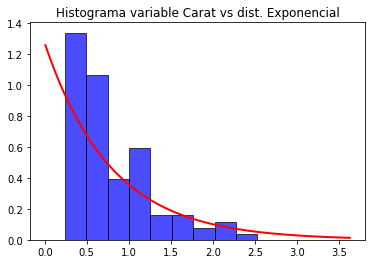

In [5]:
# Comparación con la distribución Exponencial

#distribución exponencial, estimando lambda en función del promedio
mean = pd.Series.mean(carat)
n = len(carat)
lambdaValue = mean #1.4 #0.78845

exponencial = stats.expon(scale=lambdaValue)
x = np.linspace(exponencial.ppf(0.01),
                exponencial.ppf(0.99), n)
fp = exponencial.pdf(x) # Función de Probabilidad

plotHistogram(carat, n_bins, 'Histograma variable Carat vs dist. Exponencial', x, fp)

### Conclusión

Se puede notar que el histograma tiene una tendencia decreciente.  Las distribuciones que más se parecen son: exponencial y 
gamma, sin embargo la que mejor lo representa es la distribución exponencial. 

# Pregunta 2

Seleccione 3 columnas adicionales (también cuantitativas) y realize el mismo proceso del punto 2 (45 puntos)
 - Histograma (2 puntos)
 - Parámetros y gráfica (10 puntos)
 - Justificación (3 puntos)

## Análisis de la variable 'depth'

### Comparación con la distribución:
#### Normal

La distribución normal es una distribución continua que está determinada por la media μ y la desviación estándar σ. La media es el centro de la curva con forma de campana y la desviación estándar corresponde a la extensión de la distribución.

Parámetro:

Media μ y la desviación estándar σ

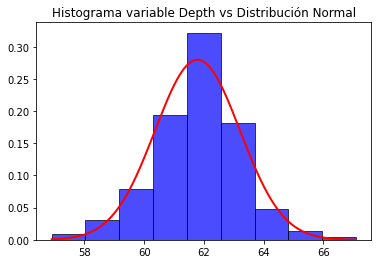

In [6]:
# Histograma de los datos de depth

# Comparación con la distribución normal

# Histograma de los datos de depth

depth = df['depth']

my_mean = pd.Series.mean(depth)
standev = pd.Series.std(depth)
min = np.min(depth)
max = np.max(depth)
n = len(depth)
x = np.linspace(min, max, n)

plotHistogram(depth, n_bins, 'Histograma variable Depth vs Distribución Normal', x, norm.pdf(x, my_mean, standev))

### Conclusión

Se puede notar que el histograma tiene una distribución normal porque una campana de Gauss.  Otra distribución que podría modelar dicha variable es t-student, sin embargo la distribución normal está muy bien.

## Análisis de la variable 'table'

### Comparación con la distribución:
#### Gamma

La distribución Gamma es adecuada para modelar el comportamiento de variables aleatorias continuas con asimétrica positiva, es decir, variables que presentan una mayor probabilidad de ocurrencia de eventos a la izquierda de la media que a la derecha.

Parpametros:
$\alpha$ (shape) es un *parámetro de forma* y $\beta$ (scale) es un *parámetro de escala*.

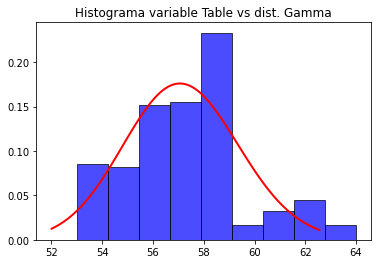

In [7]:
# Histograma de los datos de la variable table

table = df['table']

# Comparación con la distribución Gamma

shape = 635
scale = 0.09

gamma = stats.gamma(a=shape,scale=scale)
x = np.linspace(gamma.ppf(0.01),
                gamma.ppf(0.99), 100)
fp = gamma.pdf(x) # Función de Probabilidad

plotHistogram(table, n_bins, 'Histograma variable Table vs dist. Gamma', x, fp)

### Comparación con la distribución:
#### Weibull

La distribución Weibull es ampliamente utilizada en la práctica de la ingeniería para modelar la vida útil de un sistema complejo conformado por varias partes que falla cuando la primera de ellas se daña. Weibull ha sido aplicada a la resolución de problemas en las áreas de la altura de mareas, eficacia de tratamientos médicos, reclamos de seguros, mantenimiento de alumbrado público, explosión de rocas y planificación de repuestos. 

Parámetros:

Esta distribución incluye dos parámetros principales: Scale (s) > 0 y Shape ($\beta$); en algunos casos se incluye un tercer parámetro denominado Location (L). En nuestro análisis utilizaremos la versión con los dos primeros parámetros: Scale y Shape.

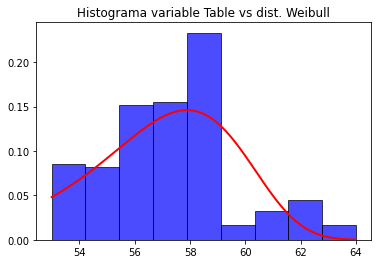

In [8]:
# Variable Table
# Comparación con la distribución Weibull

#distribución exponencial, estimando lambda en función del promedio
mean = pd.Series.mean(table)
min = np.min(table)
max = np.max(table)
lambdaValue = 500
shape = 23
scale = 58

x = np.linspace(min, max, 200)    
p = weibull_min.pdf(x, shape, scale=scale)

plotHistogram(table, n_bins, 'Histograma variable Table vs dist. Weibull', x, p)

### Conclusión

Se comparó con la distribución Gamma y Weibull.  Escogemos la distribución Gamma, porque se puede observar que el histograma tiene una forma de campana no centrada, teniendo un mayor ocurrencia en el lado izquierdo que el derecho.

## Análisis de la variable 'price'

### Comparación con la distribución:
#### Exponencial
La distribución exponencial es utilizada para determinar la probabilidad de que en cierto tiempo suceda un determinado evento.

Parámetro:

Lambda:  $\lambda$ es el inverso de la duración esperada entre eventos y representa un parámetro de intensidad del proceso.

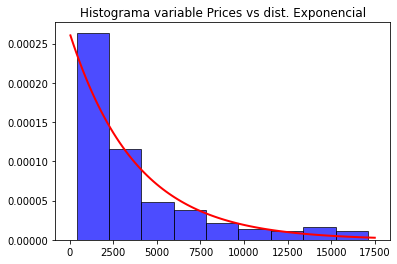

In [9]:
# Histograma de los datos de price

prices = df['price']

# Comparación con la distribución Exponencial

#distribución exponencial, estimando lambda en función del promedio
mean = pd.Series.mean(prices)
lambdaValue = 3800

exponencial = stats.expon(scale=lambdaValue)
x= np.linspace(exponencial.ppf(0.01),
                exponencial.ppf(0.99), 100)
fp = exponencial.pdf(x) # Función de Probabilidad

plotHistogram(prices, n_bins, 'Histograma variable Prices vs dist. Exponencial', x, fp)

### Comparación con la distribución:
#### Weibull
La distribución Weibull es ampliamente utilizada en la práctica de la ingeniería para modelar la vida útil de un sistema complejo conformado por varias partes que falla cuando la primera de ellas se daña. Weibull ha sido aplicada a la resolución de problemas en las áreas de la altura de mareas, eficacia de tratamientos médicos, reclamos de seguros, mantenimiento de alumbrado público, explosión de rocas y planificación de repuestos. 

Parámetros:

Esta distribución incluye dos parámetros principales: Scale (s) > 0 y Shape ($\beta$); en algunos casos se incluye un tercer parámetro denominado Location (L). En nuestro análisis utilizaremos la versión con los dos primeros parámetros.

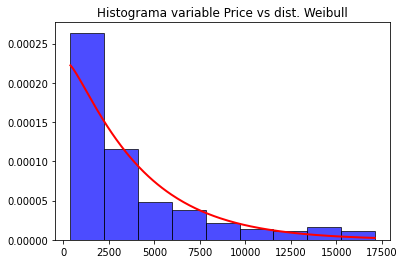

In [10]:
# Comparación con la distribución Exponencial

#distribución exponencial, estimando lambda en función del promedio
mean = pd.Series.mean(prices)
min = np.min(prices)
max = np.max(prices)
lambdaValue = 500
shape = 1.05208
scale = 3836.41566

x = np.linspace(min, max, 200)    
p = weibull_min.pdf(x, shape, scale=scale)

plotHistogram(prices, n_bins, 'Histograma variable Price vs dist. Weibull', x, p)

### Conclusión

Se comparó con la distribución Exponencial y Weibull.  Escogemos la distribución exponencial, porque se puede observar que el histograma tiene una tendencia decreciente.

# Pregunta 3

Para cada columna aplicar una prueba KS  con un $\alpha=0.05$ para determinar si la muestra en efecto sigue la misma distribución que los estudiantes plantean. Si bien es cierto en clase se abordó la prueba KS para pruebas de normalidad, estas también se pueden utilizar para cualquier otro tipo de distribución
 - 4 columnas x 10 puntos cada una (40 puntos)
 - Debe mostrarse suficiente detalle gráfico y aritmético en su respuesta

In [11]:
valorCritico = ksone.ppf(0.975,1000)
imprimirVariable('Alpha: ', 0.05)

Alpha:  :  0.05


## Prueba KS para la variable 'carat'

### Distribución Exponencial

La hipótesis para esta prueba son las siguientes:

- Hipótesis nula ($H_0$): los datos provienen de la distribución especificada. ($pValue$ >= 0.05)

- Hipótesis alternativa ($H_1$): al menos un valor no concuerda con la distribución especificada. ($pValue$ < 0.05)


PValue:  :  0.0406347721000076


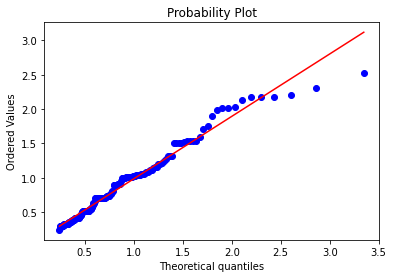

In [12]:
parametrosCarat = stats.expon.fit(carat)
_, pValueCarat = stats.kstest(carat, 'expon', args=(parametrosCarat), alternative = "less")

imprimirVariable('PValue: ', pValueCarat)

graficarTestDistribucion(carat, "expon", parametrosCarat)

El $pValue$ obtenido es  $0.0406 < 0.0500$, por lo que la hipótesis nula $H_0$ que plantea que carat proviene de una distribución exponencial, se  rechaza.

### Distribución Gamma

La hipótesis para esta prueba son las siguientes:

- Hipótesis nula ($H_0$): los datos provienen de la distribución especificada. ($pValue$ >= 0.05)

- Hipótesis alternativa ($H_1$): al menos un valor no concuerda con la distribución especificada. ($pValue$ < 0.05)


PValue:  :  0.16640766194517928


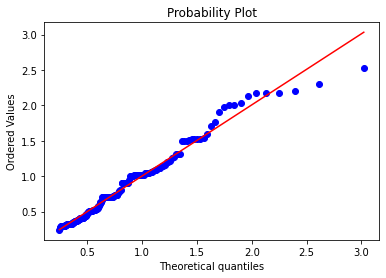

In [13]:
parametrosCarat = stats.gamma.fit(carat)
dCarat, pValueCarat = stats.kstest(carat, 'gamma', args=(parametrosCarat), alternative = "less")

imprimirVariable('PValue: ', pValueCarat)

graficarTestDistribucion(carat, "gamma", parametrosCarat)

El $pvalue$ obtenido es  $0.1664 > 0.0500$, por lo que la hipótesis nula $H_0$ que plantea que carat proviene de una distribución gamma, se confirma como cierta, porque no se tendría la suficiente evidencia como para demostrar lo contrario.

## Prueba KS para la variable 'depth'

### Distribución Normal

La hipótesis para esta prueba son las siguientes:

- Hipótesis nula ($H_0$): los datos provienen de la distribución especificada. ($pValue$ >= 0.05)

- Hipótesis alternativa ($H_1$): al menos un valor no concuerda con la distribución especificada. ($pValue$ < 0.05)

PValue:  :  0.0862204635769729


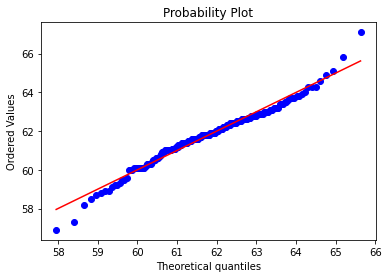

In [14]:
parametrosDepth = stats.norm.fit(depth)
_, pValueDepth = stats.kstest(depth, 'norm', args=(parametrosDepth), alternative = "less")

imprimirVariable('PValue: ', pValueDepth)

graficarTestDistribucion(depth, "norm", parametrosDepth)

El $pvalue$ obtenido es  $0.0862 > 0.0500$, por lo que la hipótesis nula $H_0$ que plantea que depth proviene de una distribución normal, se confirma como cierta, porque no se tendría la suficiente evidencia como para demostrar lo contrario.

### Distribución T-Student

La hipótesis para esta prueba son las siguientes:

- Hipótesis nula ($H_0$): los datos provienen de la distribución especificada. ($pValue$ >= 0.05)

- Hipótesis alternativa ($H_1$): al menos un valor no concuerda con la distribución especificada. ($pValue$ < 0.05)

PValue:  :  0.22262537036703167


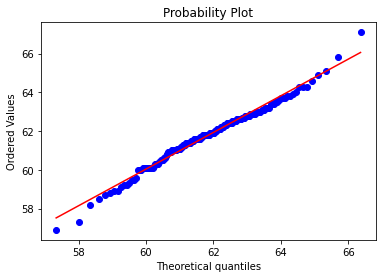

In [15]:
parametrosDepth = stats.t.fit(depth)
_, pValueDepth = stats.kstest(depth, 't', args=(parametrosDepth), alternative = "less")

imprimirVariable('PValue: ', pValueDepth)

graficarTestDistribucion(depth, "t", parametrosDepth)

El $pvalue$ obtenido es  $0.2226 > 0.0500$, por lo que la hipótesis nula $H_0$ que plantea que depth proviene de una distribución t-student, se confirma como cierta, porque no se tendría la suficiente evidencia como para demostrar lo contrario.  Comparando con el resultado de kstest de la distribución normal para depth, se puede concluir que la distribución T-Student es más similar, ya que el pvalue es más alto.

## Prueba KS para la variable 'table'

### Distribución Gamma

La hipótesis para esta prueba son las siguientes:

- Hipótesis nula ($H_0$): los datos provienen de la distribución especificada. ($pValue$ >= 0.05)

- Hipótesis alternativa ($H_1$): al menos un valor no concuerda con la distribución especificada. ($pValue$ < 0.05)

PValue:  :  0.009896940729245655


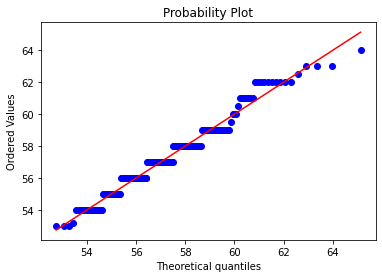

In [16]:
parametrosTable = stats.gamma.fit(table)
dTable, pValueTable = stats.kstest(table, 'gamma', args=(parametrosTable), alternative = "less")

imprimirVariable('PValue: ', pValueTable)

graficarTestDistribucion(table, "gamma", parametrosTable)

El $pValue$ obtenido es  $0.0099 < 0.0500$, por lo que la hipótesis nula $H_0$ que plantea que table proviene de una distribución gamma, se  rechaza.

### Distribución Chi2

La hipótesis para esta prueba son las siguientes:

- Hipótesis nula ($H_0$): los datos provienen de la distribución especificada. ($pValue$ >= 0.05)

- Hipótesis alternativa ($H_1$): al menos un valor no concuerda con la distribución especificada. ($pValue$ < 0.05)

PValue:  :  2.4975755363190983e-108


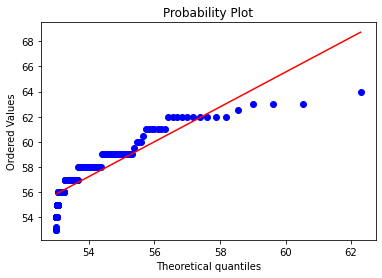

In [19]:
parametrosTable = stats.chi2.fit(table)
dTable, pValueTable = stats.kstest(table, 'chi2', args=(parametrosTable), alternative = "less")

imprimirVariable('PValue: ', pValueTable)

graficarTestDistribucion(table, "chi2", parametrosTable)

El $pValue$ obtenido es  $2.4975755363190983e-108 < 0.0500$, por lo que la hipótesis nula $H_0$ que plantea que table proviene de una distribución Chi2, se  rechaza.

### Distribución Log normal

La hipótesis para esta prueba son las siguientes:

- Hipótesis nula ($H_0$): los datos provienen de la distribución especificada. ($pValue$ >= 0.05)

- Hipótesis alternativa ($H_1$): al menos un valor no concuerda con la distribución especificada. ($pValue$ < 0.05)

PValue:  :  0.013162590714921638


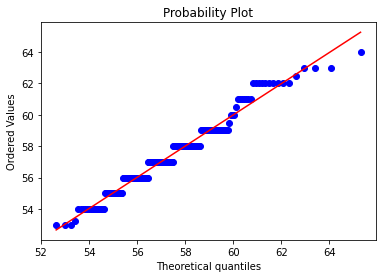

In [21]:
parametrosTable = stats.lognorm.fit(table)
dTable, pValueTable = stats.kstest(table, 'lognorm', args=(parametrosTable), alternative = "less")

imprimirVariable('PValue: ', pValueTable)

graficarTestDistribucion(table, "lognorm", parametrosTable)

El $pValue$ obtenido es  $0.0131 < 0.0500$, por lo que la hipótesis nula $H_0$ que plantea que table proviene de una distribución Log Normal, se  rechaza.

### Distribución Exponencial

La hipótesis para esta prueba son las siguientes:

- Hipótesis nula ($H_0$): los datos provienen de la distribución especificada. ($pValue$ >= 0.05)

- Hipótesis alternativa ($H_1$): al menos un valor no concuerda con la distribución especificada. ($pValue$ < 0.05)

PValue:  :  1.777292521933265e-16


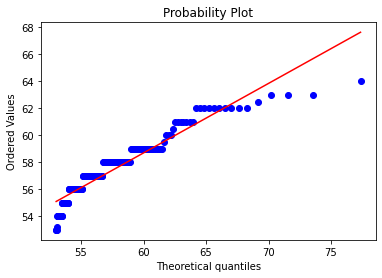

In [22]:
parametrosTable = stats.expon.fit(table)
dTable, pValueTable = stats.kstest(table, 'expon', args=(parametrosTable), alternative = "less")

imprimirVariable('PValue: ', pValueTable)

graficarTestDistribucion(table, "expon", parametrosTable)

El $pValue$ obtenido es  $1.777292521933265e-16 < 0.0500$, por lo que la hipótesis nula $H_0$ que plantea que table proviene de una distribución Exponencial, se  rechaza.

### Distribución Normal

La hipótesis para esta prueba son las siguientes:

- Hipótesis nula ($H_0$): los datos provienen de la distribución especificada. ($pValue$ >= 0.05)

- Hipótesis alternativa ($H_1$): al menos un valor no concuerda con la distribución especificada. ($pValue$ < 0.05)

PValue:  :  0.07759222017528597


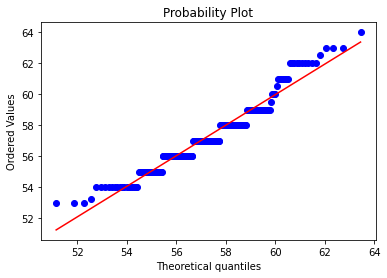

In [25]:
parametrosTable = stats.norm.fit(table)
dTable, pValueTable = stats.kstest(table, 'norm', args=(parametrosTable), alternative = "less")

imprimirVariable('PValue: ', pValueTable)

graficarTestDistribucion(table, "norm", parametrosTable)

El $pvalue$ obtenido es  $0.0775 > 0.0500$, por lo que la hipótesis nula $H_0$ que plantea que table proviene de una distribución normal, se confirma como cierta, porque no se tendría la suficiente evidencia como para demostrar lo contrario.  A pesar de todo el análisis previo con graficación de histogramas, la variable table proviene de una distribución normal.

## Prueba KS para la variable 'price'

### Distribución Exponencial

La hipótesis para esta prueba son las siguientes:

- Hipótesis nula ($H_0$): los datos provienen de la distribución especificada. ($pValue$ >= 0.05)

- Hipótesis alternativa ($H_1$): al menos un valor no concuerda con la distribución especificada. ($pValue$ < 0.05)

PValue:  :  0.4682410531480732


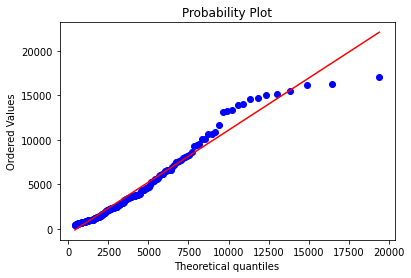

In [28]:
parametrosPrice = stats.expon.fit(prices)
dPrice, pValuePrice = stats.kstest(prices, 'expon', args=(parametrosPrice), alternative = "less")

imprimirVariable('PValue: ', pValuePrice)

graficarTestDistribucion(prices, "expon", parametrosPrice)

El $pvalue$ obtenido es  $0.4682 > 0.0500$, por lo que la hipótesis nula $H_0$ que plantea que price proviene de una distribución exponencial, se confirma como cierta, porque no se tendría la suficiente evidencia como para demostrar lo contrario.